In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import matplotlib as mpl

In [36]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 4
#mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['font.size'] = 15
mpl.rcParams['errorbar.capsize'] = 3
mpl.rcParams['lines.markeredgewidth'] = 1
mpl.rcParams['axes.axisbelow'] = True

def chi2_red(y,y_err,x,func,popt):
    puntos = len(y)
    params = len(popt)
    grados_lib = puntos - params - 1
    y_ajuste = func(x,*popt)
    
    chi_cuadrado = np.sum(((y-y_ajuste)/y_err)**2)
    chi_reducido = chi_cuadrado/grados_lib
    return chi_reducido

In [14]:
files[4]

'12780.0.csv'

In [2]:
directorypath='RLC sobre'
files = os.listdir(directorypath)
names = []
for i in range(len(files)):
    if files[i].endswith('.csv'):
        names.append(float(files[i][:-4]))
names = np.array(names)
def f(n):
    df = pd.read_csv(f'RLC sobre/{names[n]}.csv')
    vm=df.V_m
    ve=df.V_e
    t=df.t
    # plt.plot(t,vm)
    # plt.plot(t,ve)
    return t,vm,ve

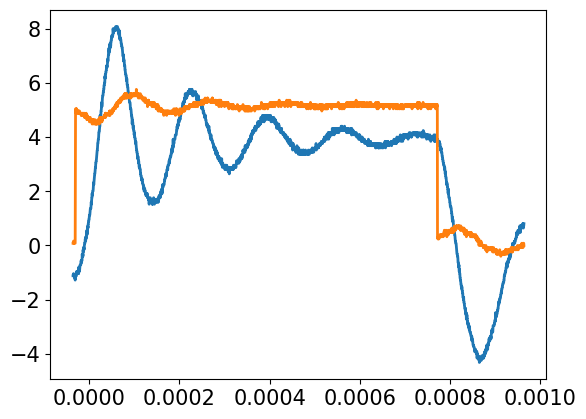

/home/seke/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


A= 37135.88999946864
tau= 0.00021190107386660417
8.975261524337295


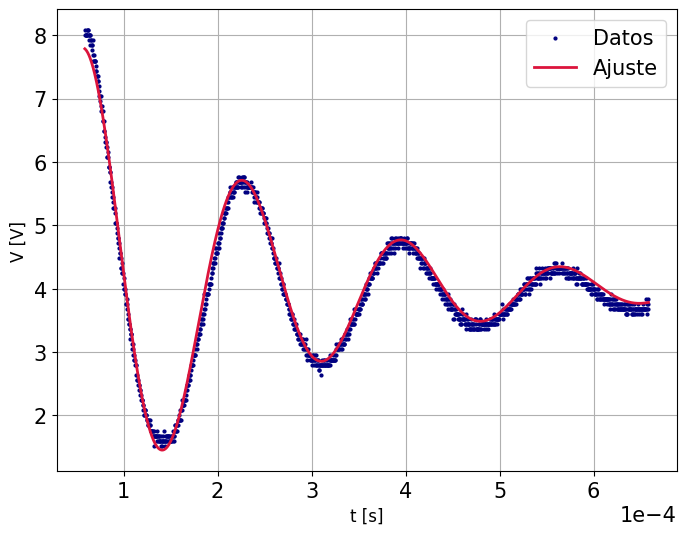

In [40]:
n=-3
t=f(n)[0]
vm=f(n)[1]
ve=f(n)[2]
plt.plot(t,vm)
plt.plot(t,ve)
plt.show()
max(vm)
k=1500
b=np.argmin(ve)
h=np.argmax(vm)
tpp= t[h:]
tp=tpp[:k]
vmpp= vm[h:]
vmp=vmpp[:k]

def seno_subamortiguado(t, A, omega, phi, tau,b):
    return 5 * np.exp(-t / tau) * np.sin(omega * (t+phi)+b )+4

# Ajusta la función a los datos
parametros_iniciales = [3,100000,0,0.009,0]  # Adivinanza inicial
parametros_optimizados, _ = curve_fit(seno_subamortiguado, tp, vmp, p0=parametros_iniciales,maxfev=100000)

# Grafica los datos y la función ajustada
plt.figure(figsize=(8, 6))
plt.scatter(tp, vmp, label='Datos', color='navy', marker='.',zorder=1)
plt.plot(tp, seno_subamortiguado(tp, *parametros_optimizados), label='Ajuste', color='crimson',zorder=2)
plt.xlabel('t [s]',fontsize=12)
plt.ylabel('V [V]',fontsize=12)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend()
plt.grid(True)
# plt.savefig(C:\Users\LCB.DESKTOP-CJ4NPO0\Downloads\RLC sobre',)
print('A=',parametros_optimizados[1])
print('tau=',parametros_optimizados[3])
plt.savefig('plots/sub.png')
print(chi2_red(np.array(vmp),np.array(vmp)*(0.01+np.random.normal(loc=0.005,scale=0.005,size=len(vmp))),np.array(tp),seno_subamortiguado,parametros_optimizados))

/home/seke/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


A= 0.0
tau= 0.0010839037072144953
7.39997851200692


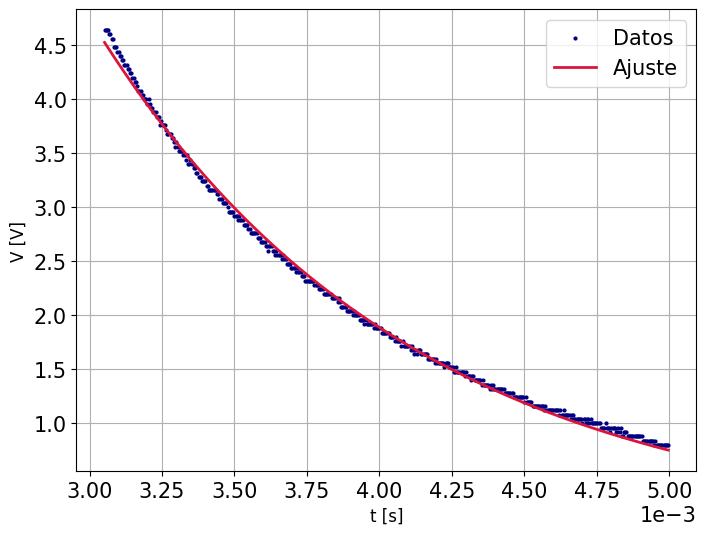

In [39]:
n=4
t=f(n)[0]
vm=f(n)[1]
ve=f(n)[2]
# plt.plot(t,vm)
# plt.plot(t,ve)
# plt.show()
max(vm)
k=1500
b=np.argmin(ve)
h=np.argmax(vm)
tpp= t[h:]
tp=tpp[:k]
vmpp= vm[h:]
vmp=vmpp[:k]

def seno_subamortiguado(t, A, omega, phi, tau,b):
    return  A*np.exp(-t / tau) 

# Ajusta la función a los datos
parametros_iniciales = [5,0,0,0.001,0]  # Adivinanza inicial
parametros_optimizados, _ = curve_fit(seno_subamortiguado, tp, vmp, p0=parametros_iniciales,maxfev=100000)

# Grafica los datos y la función ajustada
plt.figure(figsize=(8, 6))
plt.scatter(tp, vmp, label='Datos', color='navy', marker='.',zorder=1)
plt.plot(tp, seno_subamortiguado(tp, *parametros_optimizados), label='Ajuste', color='crimson',zorder=2)
plt.xlabel('t [s]',fontsize=12)
plt.ylabel('V [V]',fontsize=12)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend()
plt.grid(True)
# plt.savefig(C:\Users\LCB.DESKTOP-CJ4NPO0\Downloads\RLC sobre',)
print('A=',parametros_optimizados[1])
print('tau=',parametros_optimizados[3])
plt.savefig('plots/sobre.png')
print(chi2_red(np.array(vmp),np.array(vmp)*(0.01+np.random.normal(loc=0.005,scale=0.005,size=len(vmp))),np.array(tp),seno_subamortiguado,parametros_optimizados))